<a href="https://colab.research.google.com/github/AkothCarole/fifaresults_regression/blob/master/Revision_of_Week_6_IP_May_2020_Caroline_Akoth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question
Overview 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team

Rank of away team

Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

Dataset link: https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view

#Metric of success

To get a high percentage on the predictions of football matches played by hthe different countries in the different tournaments. 


#Data Relevance
We shall use two Datasets.

Fifa Rankings Dataset - Over years, Countries have been rankedby how they perform in the international teams against other countries. There is an award system specifically curated for how Teams get points based on their results in friendlies and competitions. The Rankings at the time this project was done were as shown here. However our dataset was taken earlier hence having different rankings.

Results Datasets - This is a record of how teams have performed against each other in the past.



#Reading data

In [0]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
#Load and Read data
fifa=pd.read_csv('fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [249]:
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


#Explore data

In [250]:
#Explore entries and data type
fifa.shape

(57793, 16)

In [251]:
fifa.describe

<bound method NDFrame.describe of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

In [252]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [253]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

#Read fifa results data

In [254]:
#Read Results
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [255]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [256]:
#Explore Results data
results.shape

(40839, 9)

In [257]:
results.describe

<bound method NDFrame.describe of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [258]:
results.columns


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [259]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [260]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

#Merge Datasets

In [261]:
#Merge Datasets(Review again)
fifaresults = pd.concat([fifa,results], axis=1,sort= True)
fifaresults.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [262]:
fifaresults.shape

(57793, 25)

In [263]:
fifaresults.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral'],
      dtype='object')

In [264]:
fifaresults.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                 float64
away_score                 float64
tournament                  object
city                        object
country                     object
neutral                     object
dtype: object

#Explore Merged dataset

In [265]:
#Check anomalies 
print (fifaresults.nunique())

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
date                       15115
home_team                    309
away_team                    306
home_score                    26
away_score                    22
tournament                   109
city                        1960
country                      266
neutral                        2
dtype: int64


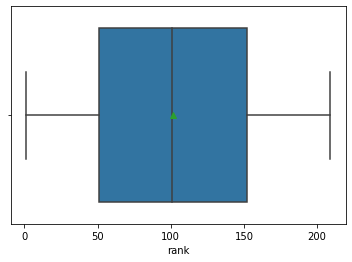

In [266]:
#Check and remove outliers
sns.boxplot(fifaresults['rank'],showmeans=True)

In [267]:
fifaresults.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                 float64
away_score                 float64
tournament                  object
city                        object
country                     object
neutral                     object
dtype: object

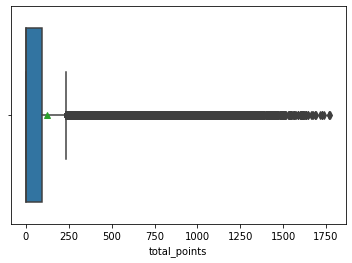

In [268]:
sns.boxplot(fifaresults['total_points'],showmeans=True)

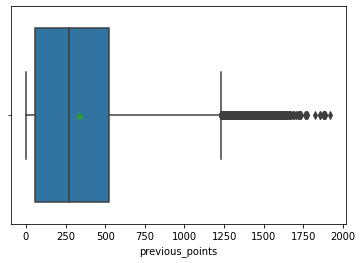

In [269]:
sns.boxplot(fifaresults['previous_points'],showmeans=True)


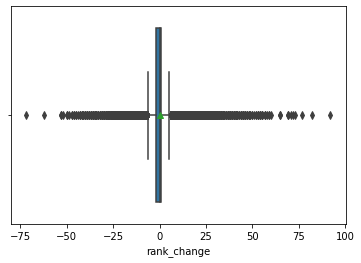

In [270]:
sns.boxplot(fifaresults['rank_change'],showmeans=True)

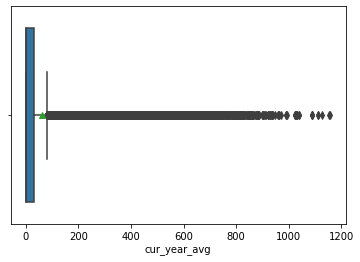

In [271]:
sns.boxplot(fifaresults['cur_year_avg'],showmeans=True)

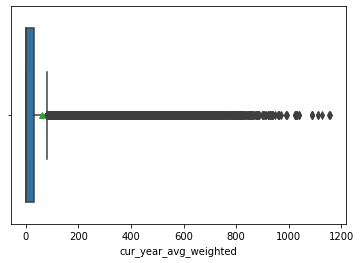

In [272]:
sns.boxplot(fifaresults['cur_year_avg_weighted'],showmeans=True)

In [273]:
fifaresults.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral'],
      dtype='object')

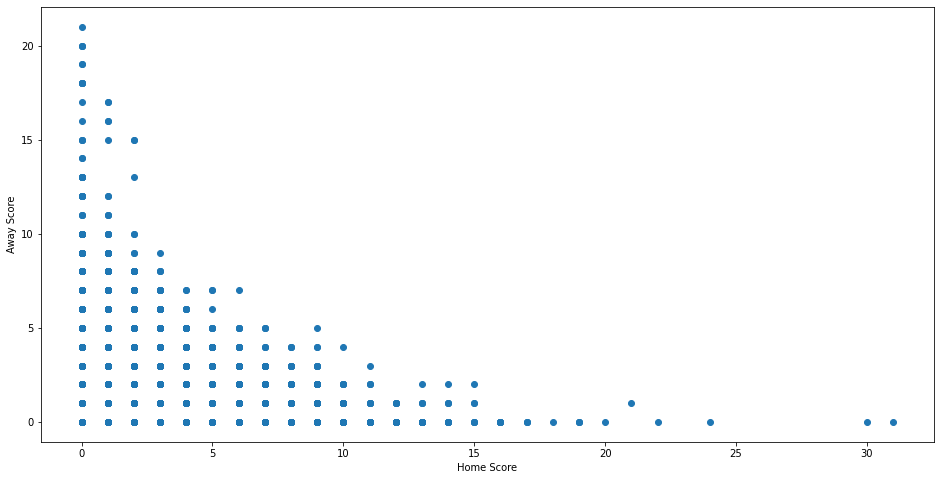

In [274]:
# Checking for Outliers using scatter plot for Home and Away
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(fifaresults['home_score'], fifaresults['away_score'])
ax.set_xlabel('Home Score')
ax.set_ylabel('Away Score')
plt.show()

In [0]:
#Dropping Outliers



In [276]:
fifaresults.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [277]:
#Drop irrelevent data
fifaresults.drop(['rank_date','country_full','date','last_year_avg'],1, inplace=True)
fifaresults.head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [278]:
#Find missing data
fifaresults.isnull().sum()

rank                           0
country_abrv                   0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
cur_year_avg_weighted          0
last_year_avg_weighted         0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
home_team                  16954
away_team                  16954
home_score                 16954
away_score                 16954
tournament                 16954
city                       16954
country                    16954
neutral                    16954
dtype: int64

In [279]:
#Drop missing data
fifaresults.dropna().head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [280]:
fifaresults=fifaresults.dropna(how='all')
fifaresults.head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [281]:
#Describe data
fifaresults.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,40839.000000,40839.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,30.502377,59.777462,17.933277,59.173916,11.834811,1.745709,1.188105
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,68.844143,136.296079,40.888849,135.533343,27.106675,1.749145,1.405120
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,13.330000,21.500000,6.450000,21.250000,4.250000,2.000000,2.000000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,584.790000,1159.710000,347.910000,1200.770000,240.150000,31.000000,21.000000


#Univariate Summaries

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


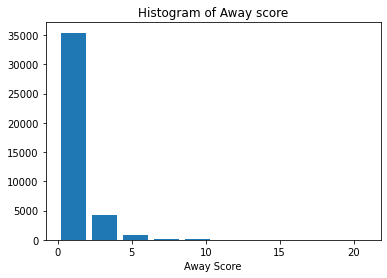

In [282]:
#Away Score
plt.hist(fifaresults['away_score'],bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Away Score')
plt.ylabel('')
plt.title('Histogram of Away score')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


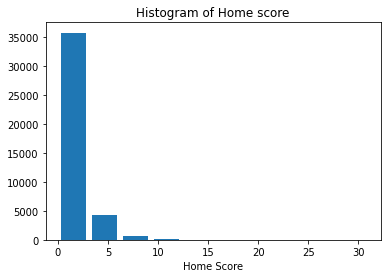

In [283]:
#Home Score
plt.hist(fifaresults['home_score'],bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Home Score')
plt.ylabel('')
plt.title('Histogram of Home score')
plt.show()

In [284]:
#Find Correlation for the variables
fifaresults.corr()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
rank,1.000000,-0.343806,-0.725829,-0.051719,-0.339931,-0.339931,-0.315358,-0.309038,-0.309037,-0.305259,-0.305259,-0.006569,-0.013709
total_points,-0.343806,1.000000,0.531626,0.019459,0.973089,0.973089,0.931486,0.915520,0.915520,0.906238,0.906239,0.002231,0.004485
previous_points,-0.725829,0.531626,1.000000,-0.028783,0.519410,0.519410,0.495404,0.483039,0.483038,0.476186,0.476186,-0.069557,-0.071836
rank_change,-0.051719,0.019459,-0.028783,1.000000,0.046161,0.046161,-0.015765,-0.004999,-0.004999,-0.000617,-0.000617,-0.011641,0.007927
cur_year_avg,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843102,0.846353,0.846353,0.839536,0.839536,0.002100,0.006115
cur_year_avg_weighted,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843102,0.846353,0.846353,0.839536,0.839536,0.002100,0.006115
last_year_avg_weighted,-0.315358,0.931486,0.495404,-0.015765,0.843102,0.843102,1.000000,0.840037,0.840037,0.849697,0.849697,0.000377,0.003790
two_year_ago_avg,-0.309038,0.915520,0.483039,-0.004999,0.846353,0.846353,0.840037,1.000000,1.000000,0.844669,0.844669,0.004233,0.000956
two_year_ago_weighted,-0.309037,0.915520,0.483038,-0.004999,0.846353,0.846353,0.840037,1.000000,1.000000,0.844669,0.844669,0.004233,0.000956
three_year_ago_avg,-0.305259,0.906238,0.476186,-0.000617,0.839536,0.839536,0.849697,0.844669,0.844669,1.000000,1.000000,0.003743,0.001913


In [285]:
#change categorical to numerical
def tournament(GAMES):
    if (GAMES == 'FIFA World Cup qualification') or (GAMES == 'FIFA World Cup'):
        return 'World_Cup'
    if GAMES == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'
fifaresults['GAMES'] = fifaresults['tournament'].apply(lambda w: tournament(w))
fifaresults['GAMES'].unique()

array(['Friendly', 'Other Matches', 'World_Cup'], dtype=object)

In [286]:
#Find correlation of variables
correlation = fifaresults[['home_team','away_team','home_score','away_score','tournament']].corr()
correlation

,home_score,away_score
home_score,1.000000,-0.133412
away_score,-0.133412,1.000000


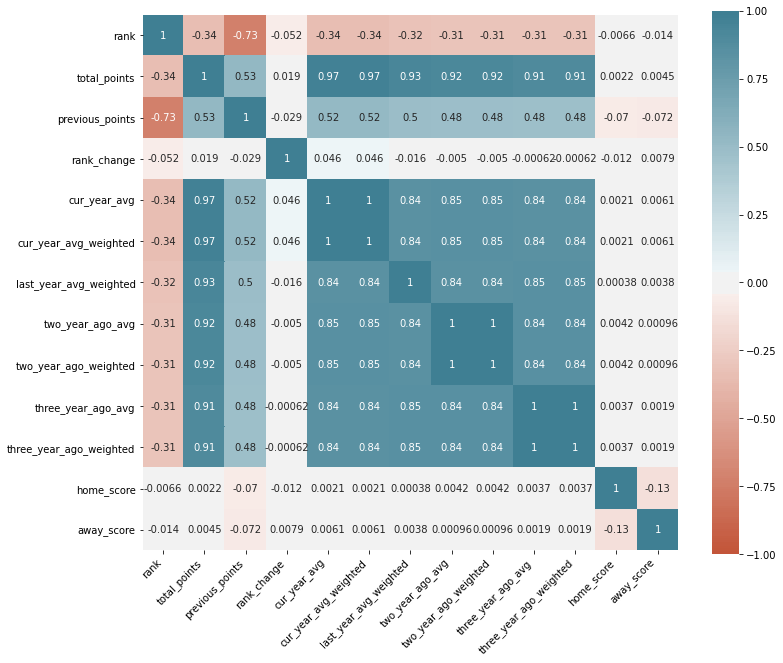

In [287]:
#Correlation heat map
plt.figure(figsize = (12,10))
correlation = fifaresults.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

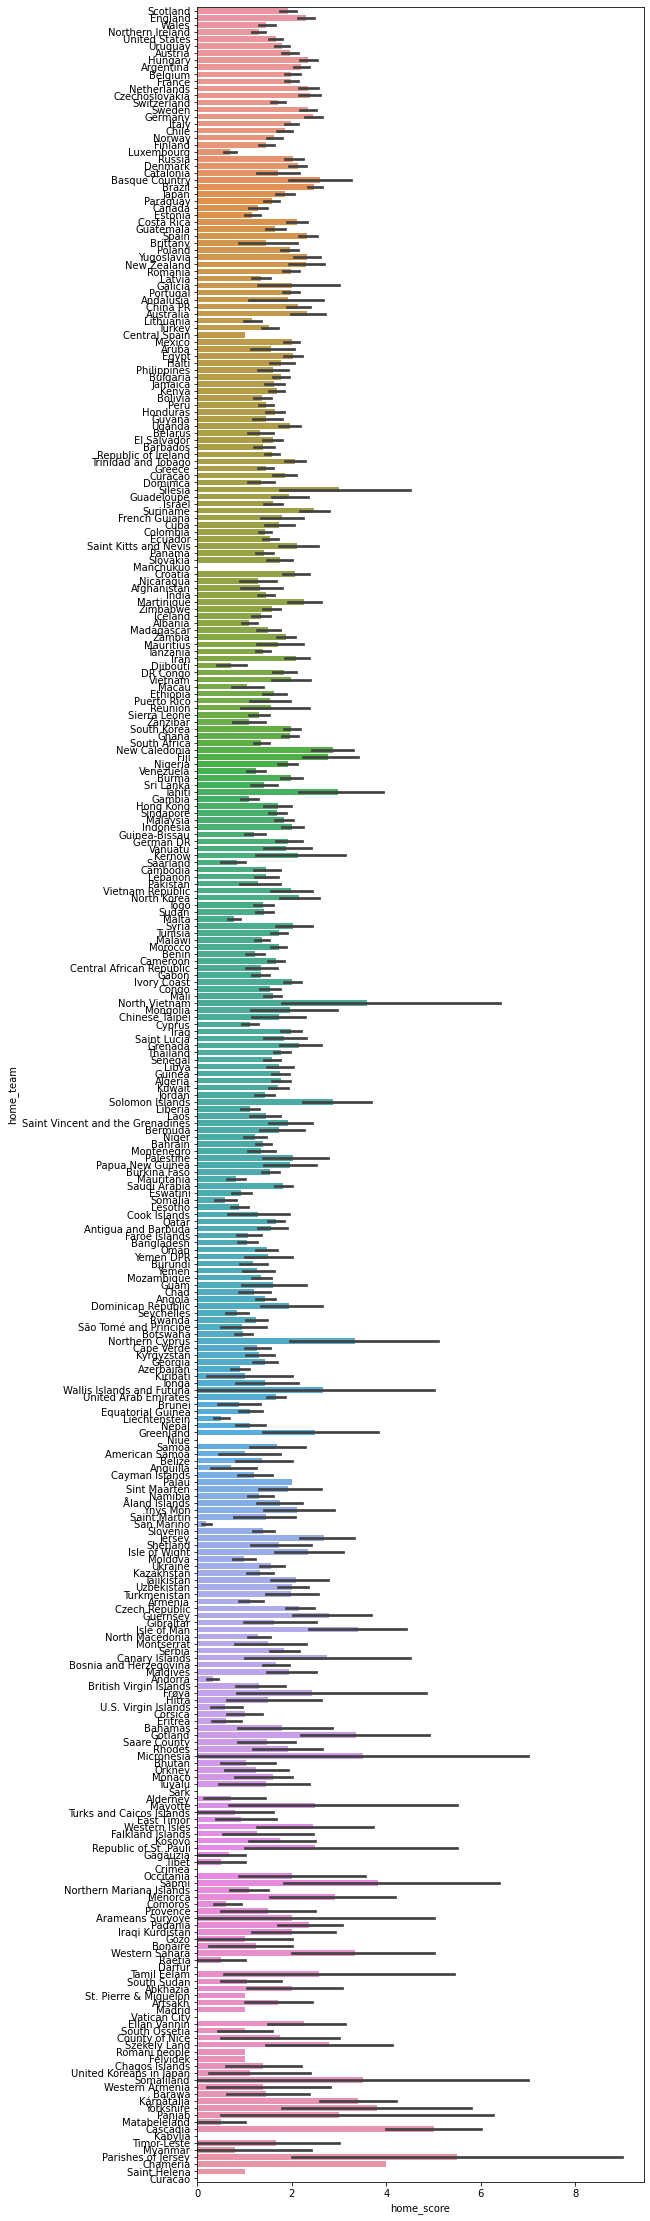

In [288]:
#Univariate Plots
fig, ax = plt.subplots(figsize=(8,40))
sns.barplot(x=fifaresults['home_score'], y= fifaresults['home_team'], ax=ax)

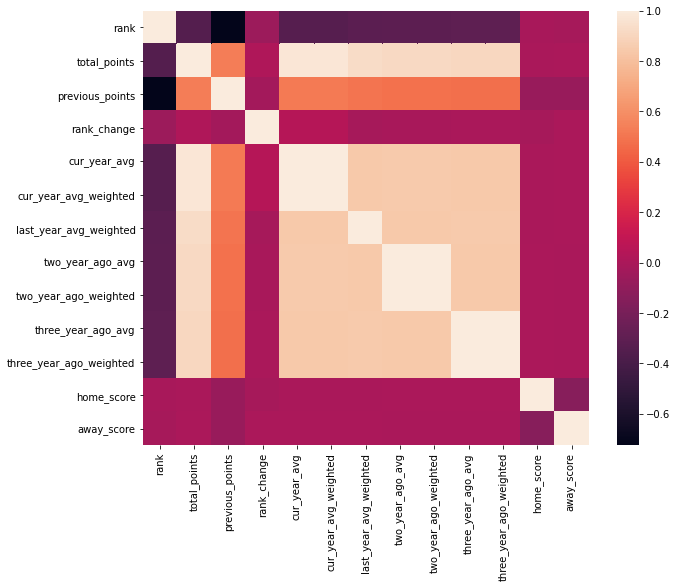

In [289]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(10,8))
corr = fifaresults.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values)

#Polynomial Regression

In [0]:
#Import Libraries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [291]:
fifaresults.head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral,GAMES
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Friendly
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False,Friendly
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Friendly
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False,Friendly
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Friendly


In [292]:
fifaresults.columns

Index(['rank', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'GAMES'],
      dtype='object')

In [0]:
#x=fifaresults[['away_score', 'rank', 'previous_points', 'rank_change']].values
#y=fifaresults['home_score'].values.reshape(-1,1)

In [309]:
#Select x and y
homescores= fifaresults[['rank', 'home_score', 'away_score']]
results= pd.get_dummies(fifaresults['tournament'], drop_first=True)
homescores= pd.concat([homescores, results], axis=1)
homescores.head()

,rank,home_score,away_score,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,AFF Championship qualification,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Atlantic Cup,Atlantic Heritage Cup,Balkan Cup,Baltic Cup,Brazil Independence Cup,British Championship,CCCF Championship,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,CONCACAF Championship,CONCACAF Championship qualification,CONIFA European Football Cup,CONIFA World Football Cup,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Artigas,Copa Bernardo O'Higgins,Copa Carlos Dittborn,Copa Chevallier Boutell,Copa Félix Bogado,Copa Juan Pinto Durán,Copa Lipton,Copa Newton,Copa Oswaldo Cruz,...,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Merlion Cup,Millennium Cup,Mundialito,NAFU Championship,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Pan American Championship,Prime Minister's Cup,Rous Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UDEAC Cup,UEFA Euro,UEFA Euro qualification,UEFA Nations League,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,Vietnam Independence Cup,Viva World Cup,WAFF Championship,West African Cup,Windward Islands Tournament,World Unity Cup
0,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
homescores.dropna(inplace=True)

In [311]:
homescores.head()

,rank,home_score,away_score,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,AFF Championship qualification,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Atlantic Cup,Atlantic Heritage Cup,Balkan Cup,Baltic Cup,Brazil Independence Cup,British Championship,CCCF Championship,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,CONCACAF Championship,CONCACAF Championship qualification,CONIFA European Football Cup,CONIFA World Football Cup,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Artigas,Copa Bernardo O'Higgins,Copa Carlos Dittborn,Copa Chevallier Boutell,Copa Félix Bogado,Copa Juan Pinto Durán,Copa Lipton,Copa Newton,Copa Oswaldo Cruz,...,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Merlion Cup,Millennium Cup,Mundialito,NAFU Championship,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Pan American Championship,Prime Minister's Cup,Rous Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UDEAC Cup,UEFA Euro,UEFA Euro qualification,UEFA Nations League,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,Vietnam Independence Cup,Viva World Cup,WAFF Championship,West African Cup,Windward Islands Tournament,World Unity Cup
0,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x=homescores['rank'].values.reshape(-1,1)
y= homescores.iloc[:,1:2].values

In [0]:
fifaresults.dropna(inplace=True)


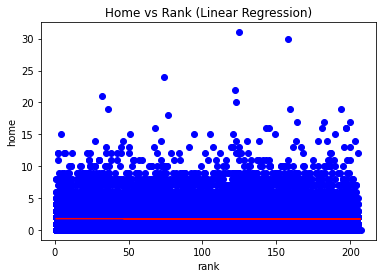

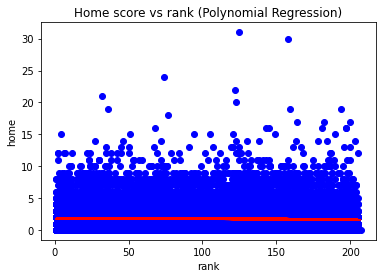

In [318]:
## Split the dataset into train and test sets 20% as test
X_train, Y_train, X_test, Y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(x,y)

# Visualize the Linear Regression results
plt.scatter(x, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(x, reg_line.predict(x), color='red')
plt.title('Home vs Rank (Linear Regression)')
plt.xlabel('rank')
plt.ylabel('home')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(x, y, color='blue') 
plt.plot(x, pol_reg.predict(X_poly), color='red')
plt.title('Home score vs rank (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('home')
plt.show()

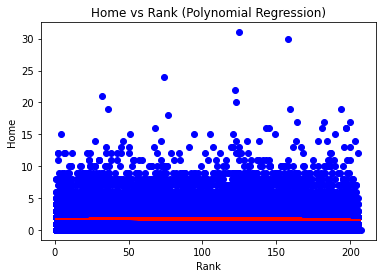

In [320]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(x, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(x, pol_reg.predict(X_poly), color='red')
plt.title('Home vs Rank (Polynomial Regression)')
plt.xlabel('Rank')
plt.ylabel('Home')
plt.show()

In [321]:
# Predict using linear regression
lin_pred = reg_line.predict([[15]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[15]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(x))

Linear prediction: 1
Polynomial prediction: 1


#Logistics Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [323]:
#Split Dataset
train = fifaresults[:28587] 

# Drop all the indexes of the train data we created above from the main data set then store the remaining data in a variable called test
test = fifaresults.drop(train.index)

# Confirm that the train and test dataset have out desired length
print("train:" + str(len(train)))
print("test:"+ str(len(test)))

train:28587
test:12252


In [324]:
#Train dataset
train_count=train['home_score'].value_counts()

# lets test home
test_count=test['home_score'].value_counts()

# Print out  train and test dataset
print(train_count)
print('*************************')
print(test_count)

1.0     8372
0.0     6554
2.0     6316
3.0     3490
4.0     1804
5.0      914
6.0      493
7.0      271
8.0      149
9.0       96
10.0      41
11.0      28
12.0      21
13.0      11
14.0       8
15.0       4
16.0       4
19.0       3
17.0       2
24.0       1
30.0       1
22.0       1
20.0       1
18.0       1
31.0       1
Name: home_score, dtype: int64
*************************
1.0     3701
0.0     3246
2.0     2723
3.0     1313
4.0      673
5.0      268
6.0      151
7.0       75
8.0       43
9.0       20
10.0      18
12.0       5
11.0       5
15.0       3
16.0       2
14.0       2
13.0       2
21.0       1
17.0       1
Name: home_score, dtype: int64


In [325]:
fifaresults.columns

Index(['rank', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'GAMES'],
      dtype='object')

In [326]:
fifaresults.head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral,GAMES
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Friendly
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False,Friendly
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Friendly
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False,Friendly
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Friendly


In [327]:
fifaresults.isnull().sum()

rank                       0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
GAMES                      0
dtype: int64

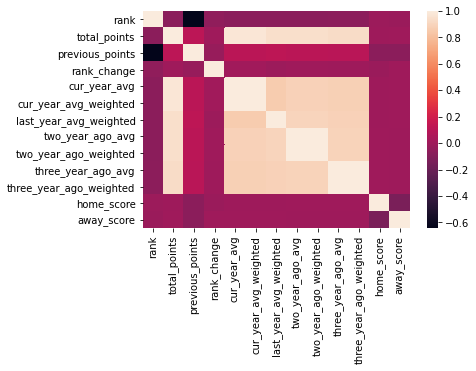

In [331]:
#Check for independence
sns.heatmap(fifaresults.corr())

In [332]:
fifaresults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 0 to 40838
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     40839 non-null  int64  
 1   country_abrv             40839 non-null  object 
 2   total_points             40839 non-null  float64
 3   previous_points          40839 non-null  int64  
 4   rank_change              40839 non-null  int64  
 5   cur_year_avg             40839 non-null  float64
 6   cur_year_avg_weighted    40839 non-null  float64
 7   last_year_avg_weighted   40839 non-null  float64
 8   two_year_ago_avg         40839 non-null  float64
 9   two_year_ago_weighted    40839 non-null  float64
 10  three_year_ago_avg       40839 non-null  float64
 11  three_year_ago_weighted  40839 non-null  float64
 12  confederation            40839 non-null  object 
 13  home_team                40839 non-null  object 
 14  away_team             

In [0]:
#Splitting dataset
x=homescores['rank'].values.reshape(-1,1)
y= homescores.iloc[:,1:2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [335]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [337]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix



array([[  16, 2893,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  16, 3665,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  13, 2656,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4, 1461,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  742,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,  363,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  191,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,  102,    0,    0,    0,    

#Conclusion and Recommendation